# Hierarchical agglomerative fragrance clustering

In [1]:
# import Python libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster import hierarchy

In [2]:
# read csv
df = pd.read_csv('result2.csv')
df = df[['accords_']]
df.head()

,accords_
0,"woody,earthy,animalic,amber,musky"
1,"fresh spicy,woody,musky,rose,amber"
2,"rose,woody,musky,oud,fruity"
3,"white floral,green,ozonic,fresh,animalic"
4,"woody,warm spicy,amber,balsamic,musky"


In [3]:
# vectorize the text - convert the string to numeric
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['accords_'].values.astype('U'))

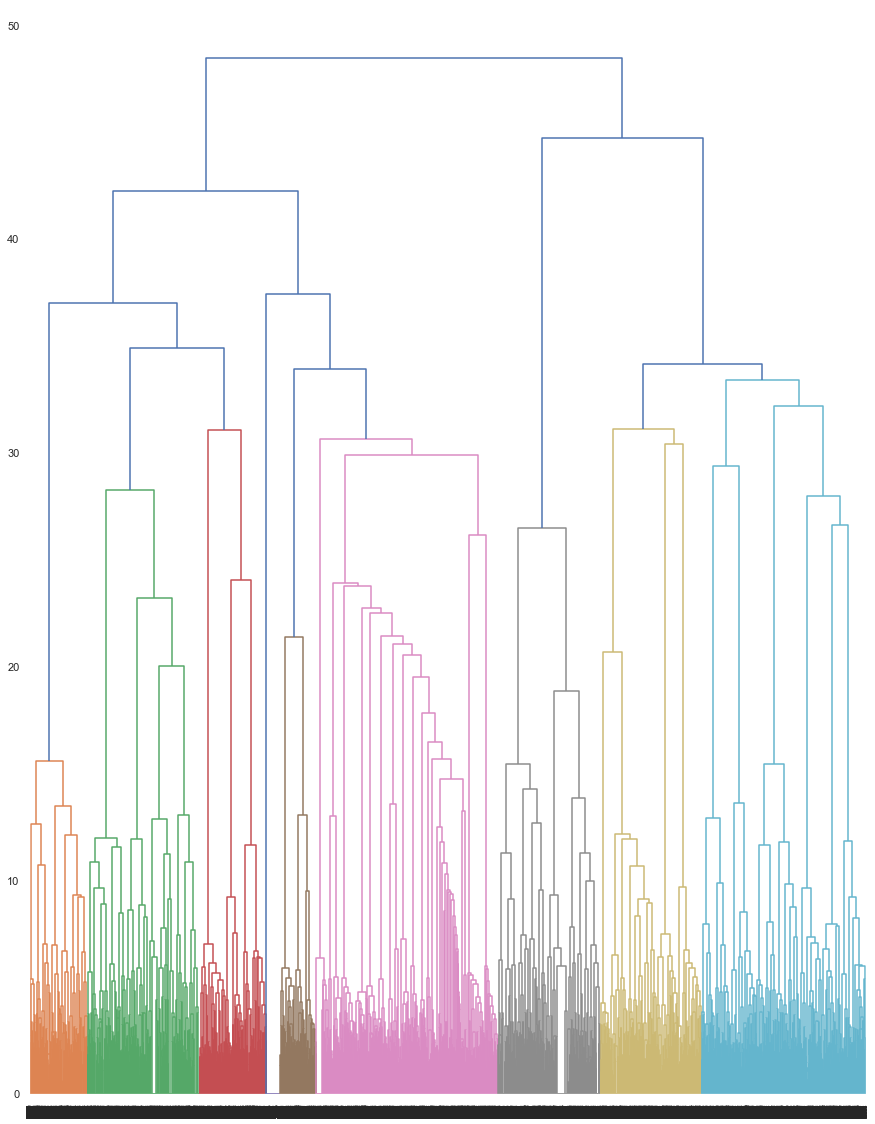

In [4]:
# create a dendrogram to find the optimal numbers of clusters
fig, ax = plt.subplots(figsize=(15, 20)) 
dend = hierarchy.dendrogram(hierarchy.linkage(X.todense(), method='ward')
                           )

fig.savefig('clusters.png', dpi=300)

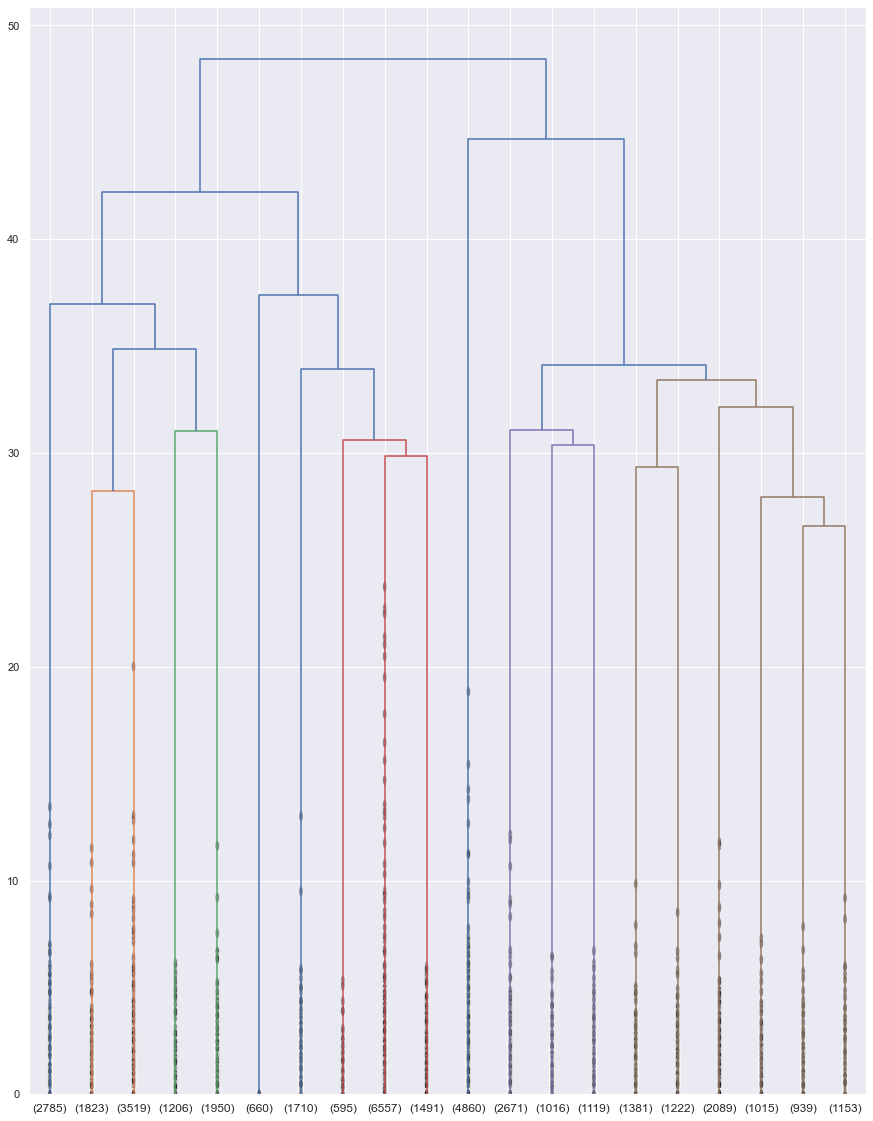

In [5]:
# create a more readable dendrogram
# (1) determine the largest vertical distance that doesn’t intersect any of the other clusters
# (2) the optimal number of clusters is equal to the number of vertical lines going through the horizontal line
# (3) the best choice for the number of clusters will be 20
fig, ax = plt.subplots(figsize=(15, 20)) 
dend2 = hierarchy.dendrogram(hierarchy.linkage(X.todense(), method='ward'),
                             truncate_mode='lastp',
                             p=20,
                             show_contracted=True,
                           )

fig.savefig('clusters2.png', dpi=300)

In [10]:
# hierarchical clustering model
from sklearn.cluster import (
AgglomerativeClustering,
)
ag = AgglomerativeClustering(
n_clusters=20,
affinity='euclidean',
linkage='ward',
)

ag.fit_predict(X.todense())

array([ 6,  4, 18, ...,  4,  2, 16])

In [12]:
df['aggclust_label'] = ag.fit_predict(X.todense())
df.head()

,accords_,aggclust_label
0,"woody,earthy,animalic,amber,musky",6
1,"fresh spicy,woody,musky,rose,amber",4
2,"rose,woody,musky,oud,fruity",18
3,"white floral,green,ozonic,fresh,animalic",8
4,"woody,warm spicy,amber,balsamic,musky",4


In [13]:
# save results to a csv file
df.to_csv('result_agglomerative_clustering.csv')

In [27]:
# calculate word frequencies per cluster
word_frequencies_by_cluster = df.groupby('aggclust_label').sum()
word_frequencies_by_cluster

,accords_
aggclust_label,
0,"woody,aromatic,fresh spicy,green,freshfruity,s..."
1,"fruity,sweet,tropical,fresh,aquaticfruity,swee..."
2,"woody,balsamic,aromatic,warm spicy,fresh spicy..."
3,"white floral,fruity,sweet,soft spicy,tuberosew..."
4,"fresh spicy,woody,musky,rose,amberwoody,warm s..."
5,"fruity,rose,sweet,citrus,white floralfruity,sw..."
6,"woody,earthy,animalic,amber,muskyfruity,patcho..."
7,"fruity,sweet,vanilla,almond,balsamicsweet,frui..."
8,"white floral,green,ozonic,fresh,animalicwoody,..."


In [33]:
# display last clsuter
df.loc[df['aggclust_label']==19].head()

,accords_,aggclust_label
1018,NaN,19
1118,NaN,19
1129,NaN,19
1139,NaN,19
1236,NaN,19


In [44]:
# calculate the number of cluster members
df['aggclust_label'].value_counts().sort_index(ascending=True)

0     4860
1     1491
2     2671
3     1950
4     2089
5     2785
6     1222
7     6557
8     1710
9      939
10    1119
11    1153
12    1206
13     595
14    1016
15    3519
16    1381
17    1823
18    1015
19     660
Name: aggclust_label, dtype: int64